In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ROI as ROI

In [2]:
from sys import platform
if platform.startswith('win'):
    filePath = 'G:/google drive/'
elif platform == 'darwin':
    filePath = '/Users/yungkuo/Google Drive/'

In [3]:
folders = ['100316 QCSE rQD PVP', 
           '100416 QCSE 40nmNR PVP',
           '100416 QCSE 40nmNR Te PVP', 
           '093016 QCSE kQD PVP',
           '020217 QCSE sandwich',
           '020717 QCSE sandwich',
           '020717 QCSE sandwich Mn',
           '021317 QCSE type-II NR']
names = ['rQD', '40nmNR', '40nmNRTe', 'kQD', '1296BZn', '9BZn', 'Mn doped', '1296BZn']

In [4]:
DF_bursts = pd.DataFrame()
DF_bursts_L = pd.DataFrame()
for name, folder in zip(names, folders):
    for f in ROI.listdir(filePath+folder+'/results/tt/csv/', '', '.csv'):
        if f.startswith('L'):
            DF1 = pd.read_csv(filePath+folder+'/results/tt/csv/'+ f, index_col=0)
            DF1['NR'] = name
            DF_bursts_L = DF_bursts_L.append(DF1)
            print(folder, (40*' ')[len(folder):],'Number of L bursts: %d' % len(DF1))
        elif f.startswith('F'):
            DF1 = pd.read_csv(filePath+folder+'/results/tt/csv/'+ f, index_col=0)
            DF1['NR'] = name
            DF_bursts = DF_bursts.append(DF1)
            print(folder, (40*' ')[len(folder):],'Number of F bursts: %d' % len(DF1))

100316 QCSE rQD PVP                       Number of F bursts: 3334
100316 QCSE rQD PVP                       Number of L bursts: 3232
100416 QCSE 40nmNR PVP                    Number of F bursts: 1109
100416 QCSE 40nmNR PVP                    Number of L bursts: 1097
100416 QCSE 40nmNR Te PVP                 Number of F bursts: 3151
100416 QCSE 40nmNR Te PVP                 Number of L bursts: 2906
093016 QCSE kQD PVP                       Number of F bursts: 3028
093016 QCSE kQD PVP                       Number of L bursts: 2803
020217 QCSE sandwich                      Number of F bursts: 427
020217 QCSE sandwich                      Number of L bursts: 408
020717 QCSE sandwich                      Number of F bursts: 486
020717 QCSE sandwich                      Number of L bursts: 413
020717 QCSE sandwich Mn                   Number of F bursts: 177
020717 QCSE sandwich Mn                   Number of L bursts: 164
021317 QCSE type-II NR                    Number of F bursts: 1739
0

DF_bursts = pd.DataFrame()
DF_bursts_L = pd.DataFrame()
for folder in folders:
    for count, f in enumerate(ROI.listdir(filePath+folder+'/results/bursts/', '', '.pkl')):
        if f.endswith('_dL.pkl'):
            DF1 = pd.read_pickle(filePath+folder+'/results/bursts/'+ f)
            DF_bursts_L = DF_bursts_L.append(DF1)
        else:
            DF1 = pd.read_pickle(filePath+folder+'/results/bursts/'+ f)
            DF_bursts = DF_bursts.append(DF1)
    print(f, (40*' ')[len(f):],'Number of files: %d' % (count+1))

In [5]:
print(DF_bursts[:3])
print(DF_bursts[len(DF_bursts)//2:len(DF_bursts)//2+3])
print(DF_bursts[-3:])
print('Total number of bursts: %d' % len(DF_bursts))

   NR No.  ncycle  score/width  start  stop  total score  width   NR
0       0       8    -0.289732     35    48    -4.056251     14  rQD
1       0       8    -0.301315     74    82    -2.711833      9  rQD
2       0       8    -0.441438    225   246    -9.711633     22  rQD
   NR No.  ncycle  score/width  start  stop  total score  width        NR
0      70      64    -0.340838      0    96   -33.061318     97  40nmNRTe
0      71      64    -0.317846      0    89   -28.606132     90  40nmNRTe
1      71      64     0.173825    439   482     7.648296     44  40nmNRTe
   NR No.  ncycle  score/width  start  stop  total score  width       NR
0     122     598     0.079532      2   599    47.560226    598  1296BZn
0     123     598    -1.140444      2   599  -681.985465    598  1296BZn
0     124     598    -0.031861      2   599   -19.053011    598  1296BZn
Total number of bursts: 13451


In [6]:
print(DF_bursts_L[:3])
print(DF_bursts_L[len(DF_bursts_L)//2:len(DF_bursts_L)//2+3])
print(DF_bursts_L[-3:])
print('Total number of bursts: %d' % len(DF_bursts_L))

   NR No.  ncycle  score/width  start  stop  total score  width          dL  \
0       0       8     6.551040    120   137   117.918727     18  117.918727   
1       0       8    10.169279    208   221   142.369908     14  142.369908   
2       0       8     6.419688    418   439   141.233138     22  141.233138   

         dF   NR  
0 -3.767243  rQD  
1  0.107261  rQD  
2 -2.494364  rQD  
   NR No.  ncycle  score/width  start  stop  total score  width          dL  \
2     195      32    -6.163279    354   395  -258.857732     42 -258.857732   
0     196      32     6.196281     53   116   396.562004     64  396.562004   
1     196      32     4.837541    357   397   198.339177     41  198.339177   

           dF        NR  
2  -14.868654  40nmNRTe  
0  256.641601  40nmNRTe  
1   52.061827  40nmNRTe  
   NR No.  ncycle  score/width  start  stop  total score  width           dL  \
0     122     598     0.461121      2   599   275.750233    598   260.200742   
0     123     598    -0.89

In [7]:
import seaborn as sns
sns.set_style("white")
sns.set_palette('hls')

In [8]:
xlabel = ['~6nm \n type-I \n CdSe/ZnS \n QD', 
          '40nm \n quasi-type-I \n CdSe/CdS \n NR', 
          '40nm \n quasi-type-I \n Te-doped \n CdSe/CdS \n NR',
         '12nm \n quasi-type-I \n CdS/CdSe/CdS \n QD',
         '12nm \n type-II \n ZnSe/CdS \n NR', # \n (batch #1)',
         '12nm \n type-II \n ZnSe/CdS \n NR \n (batch #2)',
         ' \n type-I \n Mn-doped \n QD']

In [9]:
NR_chosen = ['rQD', '40nmNR', '40nmNRTe', 'kQD', '1296BZn']
NR_exclude = ['9BZn', 'Mn doped']

In [10]:
ncycle = 8

In [11]:
DF_bursts_chosen = DF_bursts[DF_bursts['ncycle']==ncycle]
DF_bursts_chosen = DF_bursts_chosen[np.logical_and(DF_bursts_chosen['NR'] != NR_exclude[0], DF_bursts_chosen['NR'] != NR_exclude[1])]
DF_bursts_clipped = DF_bursts_chosen[np.logical_and(DF_bursts_chosen['score/width']<2, DF_bursts_chosen['score/width']>(-2))]

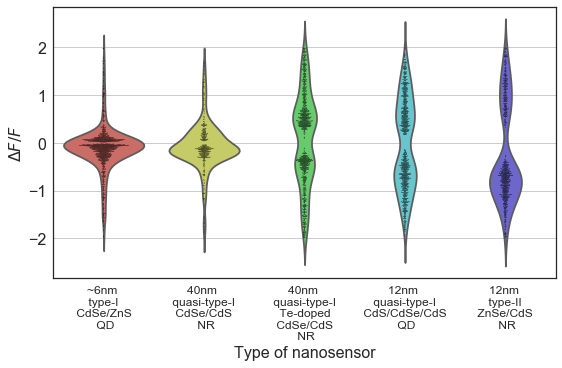

In [12]:
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.violinplot(x='NR', y='score/width', data=DF_bursts_clipped, bw=0.3, inner=None)
ax = sns.swarmplot(x='NR', y='score/width', data=DF_bursts_clipped, color='black', size=0.7)#, jitter=0.02)
ax.set_ylabel('$\Delta F/F$', fontsize=16)
ax.set_xlabel('Type of nanosensor', fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=12)
x = ax.get_xticks()
plt.xticks(x, xlabel)
plt.grid(axis='y')

In [13]:
for NR in NR_chosen:
    print(NR, 'number of bursts: %d' % np.sum(DF_bursts_clipped['NR']==NR))

rQD number of bursts: 1246
40nmNR number of bursts: 425
40nmNRTe number of bursts: 1113
kQD number of bursts: 1119
1296BZn number of bursts: 836


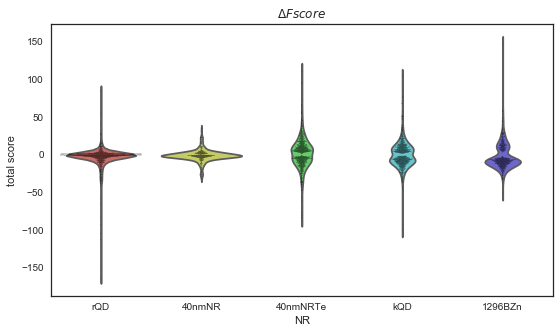

In [14]:
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.violinplot(x='NR', y='total score', data=DF_bursts_clipped, bw=0.3, inner=None)#, scale="count", inner='stick')
ax = sns.swarmplot(x='NR', y='total score', data=DF_bursts_clipped, color='black', size=0.5)#, jitter=0.02)
ax.set_title('$\Delta F score$')

In [15]:
DF_bursts_L_chosen = DF_bursts_L[DF_bursts_L['ncycle']==ncycle]
DF_bursts_L_chosen = DF_bursts_L_chosen[np.logical_and(DF_bursts_L_chosen['NR'] != NR_exclude[0], DF_bursts_L_chosen['NR'] != NR_exclude[1])]
DF_bursts_L_clipped = DF_bursts_L_chosen[np.logical_and(DF_bursts_L_chosen['score/width']<15, DF_bursts_L_chosen['score/width']>(-15))]

In [16]:
logic = np.logical_and(DF_bursts_clipped['NR']=='1296BZn', DF_bursts_clipped['score/width']<0)
np.median(DF_bursts_clipped['score/width'][logic])

-0.85491172965903162

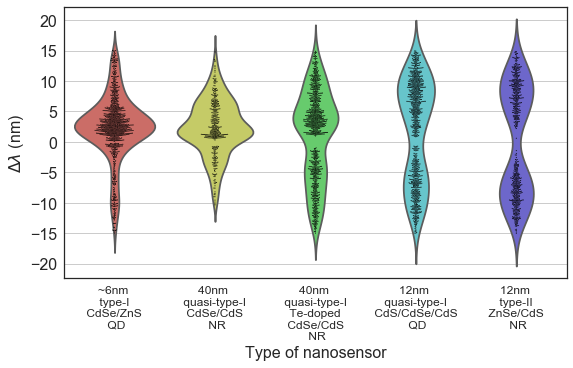

In [17]:
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.violinplot(x='NR', y='score/width', data=DF_bursts_L_clipped, bw=0.3, inner=None)
ax = sns.swarmplot(x='NR', y='score/width', data=DF_bursts_L_clipped, color='black', size=1)#, jitter=0.02)

ax.set_ylabel('$\Delta \lambda$ (nm)', fontsize=16)
ax.set_xlabel('Type of nanosensor', fontsize=16)
plt.setp(ax.get_yticklabels(), fontsize=16)
plt.setp(ax.get_xticklabels(), fontsize=12)
x = ax.get_xticks()
plt.xticks(x, xlabel)
plt.grid(axis='y')

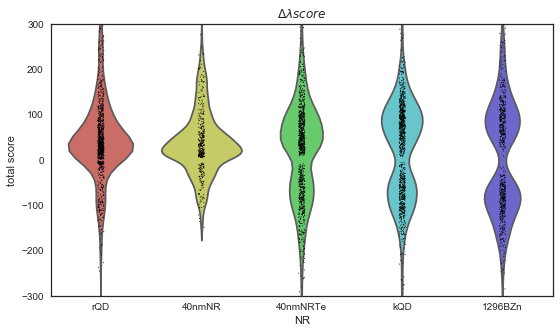

In [18]:
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.violinplot(x='NR', y='total score', data=DF_bursts_L_clipped, bw=0.2, inner=None)
ax = sns.stripplot(x='NR', y='total score', data=DF_bursts_L_clipped, color='black', size=1, jitter=0.03)
ax.set_ylim(-300,300)
ax.set_title('$\Delta \lambda score$')

In [19]:
OB = pd.DataFrame()
for folder in folders:
    F = open(filePath+folder+'/results/bursts/highest_bursts.txt', mode='r')
    for line in F.readlines():
        name = line.split('"')[0][:-1]
        if len(line.split('"')) > 1:
            num = np.array(line.split('"')[1][1:-1].split(','), dtype='float')
            for n in num:
                if name.endswith('L') and np.logical_and(n>-15, n<15):
                    OB1 = pd.DataFrame({'dL': n, 'NR': name.split('_')[0],}, index=[name])
                elif np.logical_and(n>-3, n<3):
                    OB1 = pd.DataFrame({'dFF': n, 'NR': name.split('_')[0],}, index=[name])
                OB = OB.append(OB1)

In [20]:
print(OB)

                                    NR       dFF         dL
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.038594        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD  0.148622        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD  0.032131        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD  0.053791        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.012175        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.074019        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD  0.312640        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD  0.001130        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD  0.023073        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.004444        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.004444        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.055495        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.109495        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.004555        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD -0.011548        NaN
rQD_PVP_OD0.5OD0.5_76V_8Hz_1       rQD  

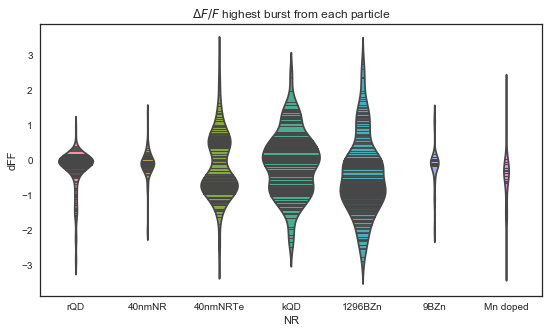

In [21]:
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.violinplot(x='NR', y='dFF', data=OB[~np.isnan(OB['dFF'])], bw=0.3, inner='stick', scale='count')
#ax = sns.stripplot(x='NR', y='dFF', data=OB[~np.isnan(OB['dFF'])], color='black', size=1, jitter=0.03)
ax.set_title('$\Delta F/F$ highest burst from each particle')

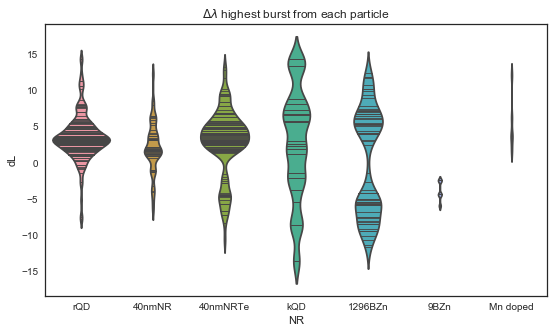

In [22]:
fig, ax = plt.subplots(figsize=(9,5))
ax = sns.violinplot(x='NR', y='dL', data=OB[~np.isnan(OB['dL'])], bw=0.2, inner='stick', scale='count')
#ax = sns.stripplot(x='NR', y='dL', data=OB[~np.isnan(OB['dL'])], color='black', size=1, jitter=0.03)
ax.set_title('$\Delta \lambda$ highest burst from each particle')

# Plot for QCSE paper

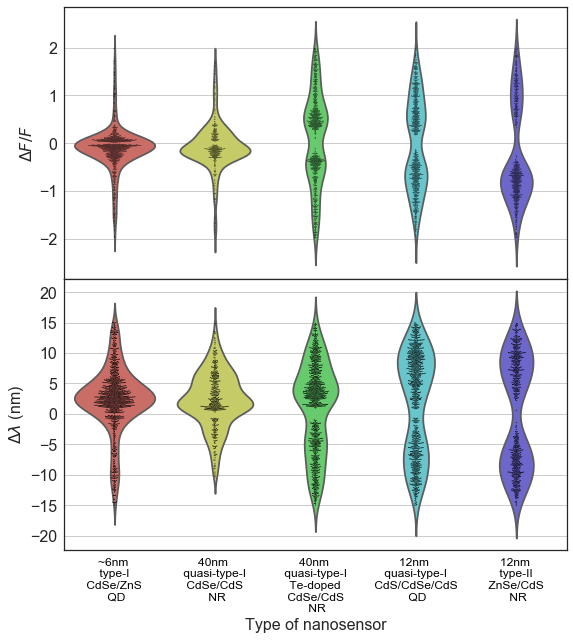

In [23]:
fig, ax = plt.subplots(2,1, figsize=(9,10))
ax[0] = sns.violinplot(x='NR', y='score/width', data=DF_bursts_clipped, bw=0.3, inner=None, ax=ax[0])
ax[0] = sns.swarmplot(x='NR', y='score/width', data=DF_bursts_clipped, color='black', size=0.7, ax=ax[0])#, jitter=0.02)
ax[0].set_ylabel('$\Delta F/F$', fontsize=16)
plt.setp(ax[0].get_yticklabels(), fontsize=16)

ax[1] = sns.violinplot(x='NR', y='score/width', data=DF_bursts_L_clipped, bw=0.3, inner=None, ax=ax[1])
ax[1] = sns.swarmplot(x='NR', y='score/width', data=DF_bursts_L_clipped, color='black', size=1, ax=ax[1])#, jitter=0.02)
ax[1].set_ylabel('$\Delta \lambda$ (nm)', fontsize=16)
ax[1].set_xlabel('Type of nanosensor', fontsize=16)
plt.setp(ax[1].get_yticklabels(), fontsize=16)
plt.setp(ax[1].get_xticklabels(), fontsize=12)
x = ax[1].get_xticks()
plt.xticks(x, xlabel, color='k')
ax[0].grid(axis='y')
ax[1].grid(axis='y')
fig.subplots_adjust(hspace=0)

In [24]:
for name in NR_chosen:
    print(name, len(DF_bursts_clipped[np.logical_and(DF_bursts_clipped['NR']==name, DF_bursts_clipped['ncycle']==8)]), 
          len(DF_bursts_L_clipped[np.logical_and(DF_bursts_L_clipped['NR']==name, DF_bursts_L_clipped['ncycle']==8)]))

rQD 1246 1147
40nmNR 425 432
40nmNRTe 1113 1072
kQD 1119 1068
1296BZn 836 727


In [25]:
DF_bursts_clipped[DF_bursts_clipped['NR']==name]

,NR No.,ncycle,score/width,start,stop,total score,width,NR
0,0,8,-0.455531,48,57,-4.555309,10,1296BZn
1,0,8,0.712163,136,154,13.531092,19,1296BZn
2,0,8,-0.606216,177,185,-5.455942,9,1296BZn
3,0,8,0.753525,206,229,18.084593,24,1296BZn
4,0,8,0.553775,268,280,7.199077,13,1296BZn
5,0,8,-0.490901,544,552,-4.418113,9,1296BZn
0,1,8,0.608969,9,25,10.352477,17,1296BZn
1,1,8,0.587389,70,79,5.873886,10,1296BZn
2,1,8,0.671503,167,184,12.087048,18,1296BZn
3,1,8,0.470331,477,489,6.114297,13,1296BZn
